In [5]:
import matplotlib.pyplot as plt
import scipy as sp
import scipy.constants as spc
from matplotlib.widgets import Button # , Slider
import threading
import sys
import time
import os
from scipy import interpolate
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib
from GDD import PicoScope as ps  # module for pico_scope
#from GDD import ZabberVoiceCoil # module to operate stage 
import numpy as np
from IPython.display import display
%matplotlib notebook


In [10]:
class ProcessGDD(object): #TODO live class
    """
    Class used for a adding live update to a figure. Run ´%matplotlib notebook´ in jupyter notebook
    for optimal operation of this class. This adds

    Attributes
    ----------
    rp: `object`
        This object is a Oscilloscope object (initially from Red Pitaya, class daq.devices_new.RPdevice()).
    rpplot: `object`
        This object is a fastplot object (class daq.FastPlotNotebook())."""
    
    def __init__(self):
        
        #initialize values
        self.N = int(1e6)
        self.timeS = sp.linspace(0,1,self.N)
        self.signal_HeNe = sp.zeros(self.N)
        self.signal_SC = sp.zeros(self.N)
        self.n_daq_smp = int(1e6)
        #self.ps = ps.DAQ_parallel_channels(Samples_per_channel= self.n_daq_smp)

    def clear(self):
        self.signal_HeNe = sp.zeros(self.N)
        self.signal_SC = sp.zeros(self.N)
        
    def update_data(self):
#         self.timeS,data = self.ps.DAQ_read()
#         self.timeS *=1e-9
        data = sp.load('new_data_04march.npy')
        self.timeS = data[:,0]*1e-9
        self.signal_HeNe = data[:,2]
        self.signal_SC = data[:,1]

    def close(self):
        self.ps.DAQ_close()
       
        # TODO close daq
        

In [11]:
class FastPlotNotebook(object):
   
    def __init__(self,p):
        %matplotlib notebook
        self.p = p
        #self.i = 0
        #fig, ax1, = plt.subplots(1,3,figsize=(30/2.54,10/2.54))
        fig,ax1 = plt.subplots(1,figsize=(15/2.54, 15/2.54))
        self.fig = fig
        self.ax1 = ax1
        self.ax1.set_title('HeNe, IR')
        self.ax1.set_xlim(0,1)
        self.ax1.set_ylim(-10,10)
        self.ax1.set_xlabel('Time (s)')
        self.ax1.set_ylabel('Signal (a.u.)')     
        timeS = self.p.timeS
        signal_HeNe = self.p.signal_HeNe
        signal_SC = self.p.signal_SC
         
        self.HeNe_pl, = self.ax1.plot(timeS[::100],signal_HeNe[::100])
        self.SC_pl, = self.ax1.plot(timeS[::100],signal_SC[::100])
        
        
        self.fig.tight_layout()
        self.fig.subplots_adjust(wspace = 0.7,bottom = 0.2)
    
    def update_plot(self):
#         self.i +=1
#         self.ax1.set_title('HeNe, IR:{}'.format(self.i))
        timeS = self.p.timeS
        signal_HeNe = self.p.signal_HeNe
        signal_SC = self.p.signal_SC
    
        self.HeNe_pl.set_data(timeS[::100],signal_HeNe[::100])
        self.SC_pl.set_ydata(signal_SC[::100])
        self.fig.canvas.draw()

   

In [12]:
class LiveOsci(object): #TODO live class
   
    def __init__(self):  #(self#,pico_scope,plot_obj)
        self.p = ProcessGDD()
        self.plot_obj = FastPlotNotebook(self.p)
        global loopBool
        loopBool = False
        self.getbuttons()
    
    def getbuttons(self):
        axcolor = 'lightblue'
        ttax = plt.axes([0.05, 0.01, 0.15, 0.06])
        self.buttontt = Button(ttax, 'Single sweep', color=axcolor, hovercolor='0.975')
        self.buttontt.on_clicked(self._update_trace)
        
        runax = plt.axes([0.35, 0.01, 0.05, 0.06])
        self.buttonrun = Button(runax, 'Run', color=axcolor, hovercolor='0.975')
        self.buttonrun.on_clicked(self._looping_pre) #the run command has to be started throgh a thread with a global condition in order to interupt it
        
        stopax = plt.axes([0.425, 0.01, 0.05, 0.06])
        self.buttonstop = Button(stopax, 'Stop', color=axcolor, hovercolor='0.975')
        self.buttonstop.on_clicked(self._stop_meas)
        
        clearax = plt.axes([0.525, 0.01, 0.05, 0.06])
        self.buttonclear = Button(clearax, 'clear', color=axcolor, hovercolor='0.975')
        self.buttonclear.on_clicked(self._clear_button)
 
        # TODO buttons for clear and save
        
    def _looping_pre(self, event): #this is new
        global loopBool
        if (loopBool == False): #this is needed to prevent problems when the runbutton is started twice
            thread=threading.Thread(target=self._run_meas,args=(event,))
            thread.daemon=True   #might or might not be needed
            thread.start()

    # *********** Button callbacks ********************
    def _run_meas(self,event):
        global loopBool
        loopBool = True
        while loopBool:
            self.p.update_data()
            self.plot_obj.update_plot()
#             time.sleep(0.5)
        
    def _update_trace(self,event):
        self.p.update_data()
        self.plot_obj.update_plot()
        
    def _stop_meas(self, event):
        global loopBool
        loopBool = False
#         self.process_inst.close()
        
    def _clear_button(self, event):
        global loopBool
        loopBool = False
        self.p.clear()
        self.plot_obj.update_plot()
        
    
        
    def close_communication(self):
        self.p.close()

<IPython.core.display.Javascript object>


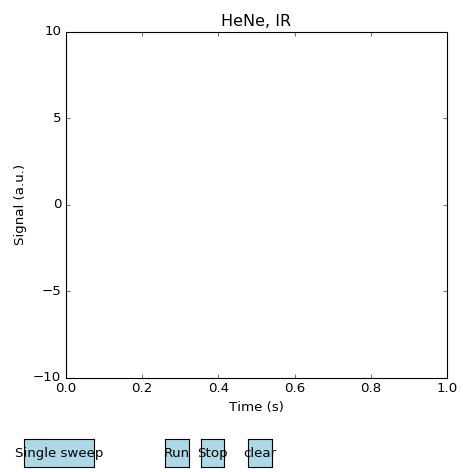

In [13]:

liveplt = LiveOsci() #rp,rpplot


In [12]:
liveplt.close_communication()

In [6]:
rp.DAQ_close()

NameError: name 'rp' is not defined

In [71]:
class TestClass(object):
    
    def __init__(self):
        self.variable = 1    # public variable
        self._private_var = 5
        
    def _private_function(self):
        return self._private_var
    
    def public_function(self):
        return self._private_function()

In [72]:
inst1 = TestClass()

In [73]:
inst2 = TestClass()

In [74]:
inst1.public_function()

5

In [84]:
a = inst1.variable

In [85]:
a += 3

In [86]:
inst1.variable

1

In [ ]:

    ""